# VIC - Introduction to Visual Computing

**Instructor:** Maria Vakalopoulou  
**T.A.:** Mihir Sahasrabudhe	                                              
**Date:** December 11, 2020

## Low-Level Vision, Image Filtering, Edge Detection.

During this exercise, you will become familiar with image processing and low level vision in python. Afterwards you will hopefully have a better feeling for the connection between an algorithm described as mathematical formulas (as e.g., in the book Computer Vision: Algorithms and Applications) and how such an algorithm might be implemented.

For this exercise you can use any image you want from scipy, or any other from the publicly available [Berkeley segmentation dataset BSDS500](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/resources.html) containing natural images with contour annotations. Use SCIPY to load the .mat files. You can work with one of the image’s spectral bands, but you can try to generalize the exercise for three band images.

For the lab exercies use jupyter (or you can use anything else at your own risk). It can be install by issuing `pip install jupyter` on linux after installing pip itself with `apt install python-pip`. Windows users can find the installation intructions online. The first thing that is needed is to import some libraries, such as NUMPY, SCIPY, RANDOM and MATPLOTLIB for visualization. If they are missing you can simply install them with e.g., `pip install numpy`


In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy as sp

### Task

Consider the filter `f = [1,3,2]` and the 1D image `I = [0,1,2,3,3,3,1,3,6]`. What is the result of `f*I`? Implement your own convolution and then compare it to `np.convolve`. Pad the image with zeros at the boundaries if necessary. Plot the two functions and observe their difference. Use `matplotlib` to plot. What does this filter do? Try to apply it multiple times. It has a problem, how to solve it?


Length of input image: 9
Length of new image: 10
My convolution : [1, 5, 11, 20, 26, 28, 24, 29, 28, 24]
Numpy Convolution: [  2988433   9886577  27322383  62333614 126928930 232498360 386163048
 565894789 634056140]


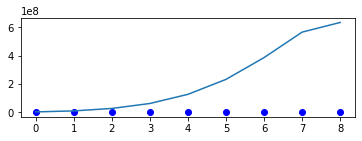

In [58]:
I = np.asarray([0,1,2,3,3,3,1,3,6])
kernel = np.asarray([1,3,2,4])

def my_convolution(kernel, I):
    len_kernel = len(kernel)
    pad_len = len_kernel // 2
    front = np.array([0]*pad_len)
    back = np.array([0]*pad_len)
    I = np.concatenate((front, I, back))
    len_I = len(I)
    new_I = [np.dot(kernel[::-1], I[i:i+len_kernel]) for i in range(len_I - len_kernel+1)]
#     for i in range(len_I - len_kernel):
#         new_I.append(np.sum(kernel*I[i:i+len_kernel]))
    return new_I
new_I = my_convolution(kernel, I)
new_I_np = I
for i in range(9):
    new_I_np = np.convolve(kernel, new_I_np, 'same')
# is_equal = new_I == new_I_np
# print(all(is_equal))
print("Length of input image:", len(I))
print("Length of new image:", len(new_I))
print("My convolution :", new_I)
print("Numpy Convolution:", new_I_np)

plt.figure(1)
plt.subplot(211)
plt.plot(range(9), I, 'bo', range(9), new_I_np)

In [4]:
??np.convolve

### Task

Read an image and the corresponding ground truth from the dataset. Plot both images.

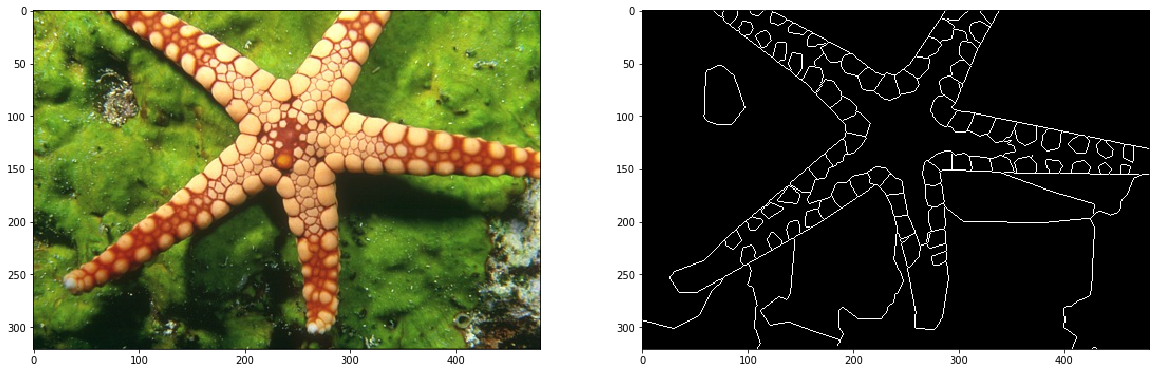

In [72]:
#Read the image with the ground truth
import scipy.io
from scipy import ndimage
mat = scipy.io.loadmat('12003.mat')
# print(mat['groundTruth'])
bound = mat['groundTruth'][0,2][0][0][1]
image = plt.imread('12003.jpg')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(bound, cmap='gray')
# conversion to grayscale
r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
img = 0.2989 * r + 0.5870 * g + 0.1140 * b

### Task

Implement a function to add salt and pepper noise to your images (consider switching to grayscale i.e., 1 channel images).

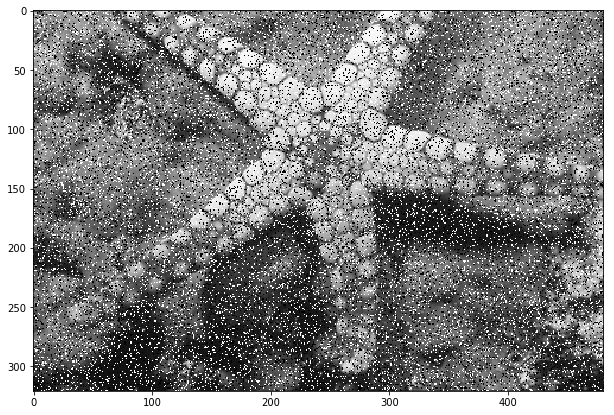

In [3]:
#add salt and pepper noise
import random
def sp_noise(image,prob):
    """
    Add salt and pepper noise to image
    prob: Probability of the noise
    """
  
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

saltnpepper = sp_noise(img, 0.1)
plt.figure(figsize=(14,7))
plt.imshow(saltnpepper,cmap='gray')

### Task

Implement the MEAN, GAUSSIAN and MEDIAN filters to remove the noise from the image. Take some time to check the different results. Which filter behaves better and why? You can use from `scipy` the `convolve2d` for the convolutions. For the gaussian filter use the `gaussian_filter` function of the `scipy`.


### TASK

Using the initial image that you have chosen. Implement the Sobel and Laplacian filter. Perform the same using the smoothed images from a gaussian filter. What do you observe? You can compare your results after thresholding them with the annotations given from the BSDS500 dataset, reporting overall accuracy, precision and recall.


### Task 

Use the thresholded edges and choose the appropriate morphological filters, with the appropriate structure elements to make your edges better and to augment your overall accuracy. Hint use scipy for the morphological operators

### Task

Use the Fourier Transform to transform your image and use it in order to:

1. Denoise your image you have produced with the salt and pepper noise.
1. Detect the edges of the initial image and report their accuracy.

You can use `scipy.fftpack` or `numpy.fft`. In the latter case don't forget to use `numpy.fft.fftshift` (and read the documentation).
